# Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [4]:
df = pd.read_csv("spam_cleaned.csv")
df.head()

,label,text
0,ham,Go until jurong point crazy.. Available only i...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf he lives arou...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull()

,label,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [7]:
df.size

11144

In [8]:
df.shape

(5572, 2)

# Exploratory Data Analysis (EDA)

In [10]:
# Create a message length column
df['length'] = df['text'].apply(len)

# Set plot style
sns.set(style="whitegrid")


## Pie Chart 

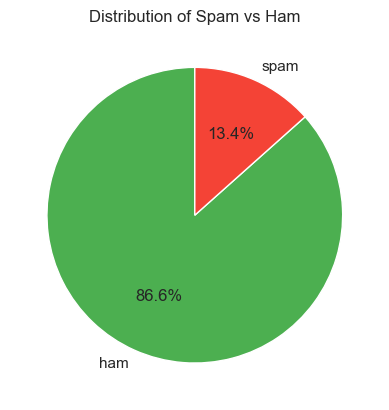

In [12]:
label_counts = df['label'].value_counts()
fig, ax = plt.subplots()
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=["#4CAF50", "#F44336"])
ax.set_title("Distribution of Spam vs Ham")
plt.show()

## Histogram

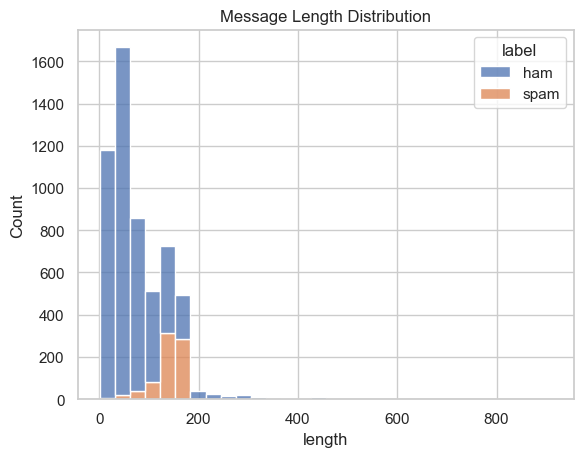

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.histplot(data=df, x="length", hue="label", multiple="stack", bins=30, ax=ax)
ax.set_title("Message Length Distribution")
plt.show()


## Line Plot

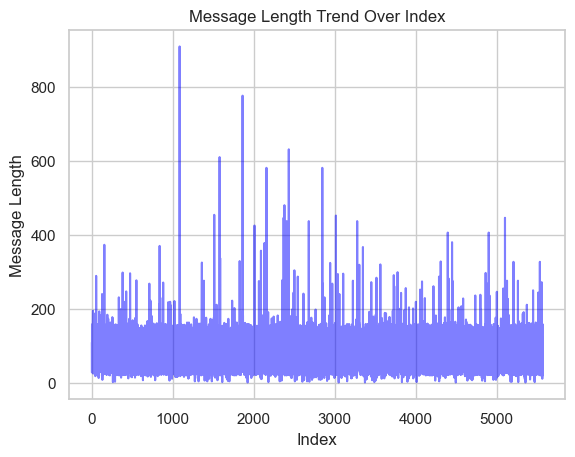

In [16]:
fig, ax = plt.subplots()
colors = df['label'].map({'ham': 'green', 'spam': 'red'})
ax.plot(df.index, df['length'], color='blue', alpha=0.5)
ax.set_title("Message Length Trend Over Index")
ax.set_xlabel("Index")
ax.set_ylabel("Message Length")
plt.show()


# Machine Learning

## Preprocessing

In [19]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = df['text']
y = df['label']

## TF-IDF Vectorization

In [21]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = tfidf.fit_transform(X)

## Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Model Naive Bayes

In [25]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [26]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Insights
 
* 87% ham, 13% spam – dataset is imbalanced.

* Spam messages are longer than ham ones.

* Applied TF-IDF for text vectorization.

* Naive Bayes performed best among all models.

* Class imbalance may affect results – can be improved with balancing.